# Laboratorio 3: Gradient Descent Methods

Instrucciones: Implemente el algoritmo gradient descent y utilícelo para resolver cada uno de los problemas presentados a continuación.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problema 1

Aplique el método GD para minimizar la función cuadrática:

$$
f(x)=\frac{1}{2} x^{T} Q x+c^{T} x
$$

Detenga la ejecución del algoritmo cuando $\left\|\nabla f\left(x_{k}\right)\right\|<\epsilon$ o bien cuando el número de iteraciones exceda un N dado. Utilice los valores de $Q$, $c$, $\epsilon$, $N$ y el punto inicial $x_0$ listados a continuación. Para la elección de $\alpha_k$ aplique:

- Step size exacto: Esto es $\alpha_{k} \triangleq \arg \min _{\alpha \geq 0} f\left(x_{k}-\alpha_{k} \nabla f\left(x_{k}\right)\right)$

- Step size constante: Esto es $\alpha_k = \alpha$ para todo $k \geq 0$. Pruebe con $\alpha = 0.001, 0.01, 0.1, 0.5$ y $1$. ¿Qué sucede con el algoritmo para las distintas elecciones de $\alpha_k$?

- Step size variable: Utilice la sucesión $\alpha_k = \frac{1}{k}$ para todo $k>0$.

Para cada caso, su output debe ser mostrado en una tabla con las cuatro columns siguientes:

- El número $k$ de la iteración
- $x_k$
- La dirección $p_k$
- $\left\|\nabla f\left(x_{k}\right)\right\|$

Finalmente, realice una gráfica de $\left\|\nabla f\left(x_{k}\right)\right\|$ versus $k$, en donde se observe el comportamiento del algoritmo para cada una de las formas de elegir el step size $\alpha_k$. ¿Qué observa? ¿Con cuál elección se obtiene el mejor comportamiento?

In [2]:
# Función para realizar descenso de gradiente de una función cuadrática
# con la forma: f(x) = xT Q x + c x
def gradientDescent(df, x0, epsilon = 1E-6, max_iter = 100, step_size_type = "Exacto", step_size_val = 0.001, alpha_params=None): 

    # Se coloca x0 como primer valor de xk
    xk = x0.copy()

    # Iteración actual
    k = 0                           

    # Se inicializa el dataframe que almacenará los datos de cada iteración
    table = pd.DataFrame(columns = ["k", "Xk", "Pk", "||df||"])

    # Se agregan los datos de la primera fila
    table = table.append({"k": 0, "Xk": xk, "Pk": df(xk), "||df||": np.abs(df(xk))}, ignore_index=True)

    # Método de GD:
    # - Determinar la dirección pk
    # - Determinar el step size ak
    # - Iterar sobre la aproximación inicial utilizando x_k+1 = xk + ak*pk
    while (np.abs(df(xk)) >= epsilon).any() and (k < max_iter):

        # Se incrementa el número de iteraciones
        k += 1

        # Dirección: grad(f)
        grad = df(xk)

        # Step size:
        # - Exacto: Obtenido al solucionar un problema de optimización
        # - Constante: Valor constante para toda iteración
        # - Variable: Valor dado según sucesión 1/k
        if step_size_type == "Exacto":
            
            # Ver pág 23 de Lecture 6. Solo para la ecuación cuadrática
            alpha = (grad.T @ grad) / (grad.T @ alpha_params["Q"] @ grad)

        elif step_size_type == "Constante":
            alpha = step_size_val

        elif step_size_type == "Variable":
            # Sucesión decreciente
            alpha = 1/k

        # Iteración:
        xk = xk - alpha * grad

        # Se agrega la información actual al dataframe
        table = table.append({"k": k, "Xk": xk, "Pk": grad, "||df||": np.abs(grad)}, ignore_index=True)

    return table

Pruebe su programa con los siguientes parámetros:

1. $Q=\left[\begin{array}{ccc}2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 2\end{array}\right], \quad c=\left[\begin{array}{l}1 \\ 0 \\ 1\end{array}\right], \quad x_{0}=\left[\begin{array}{l}3 \\ 5 \\ 7\end{array}\right], \quad \epsilon=10^{-6}, \quad N=30$

2. $Q=\left[\begin{array}{ccc}2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 2\end{array}\right], \quad c=\left[\begin{array}{l}1 \\ 0 \\ 1\end{array}\right], \quad x_{0}=\left[\begin{array}{c}-1 \\ 2 \\ -3\end{array}\right], \quad \epsilon=10^{-6}, \quad N=30$

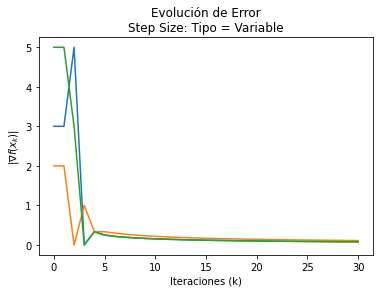

In [21]:
# Coeficientes Q
Q = np.array([[ 2, -1,  0],
              [-1,  2, -1],
              [ 0, -1,  2]])

# Biases
c = np.array([[1, 0, 1]]).T

# Gradiente de función cuadrática
# A partir de Python 3.5 la multiplicación matricial se puede hacer con "@"
df = lambda x: Q @ x + c

# Aproximación inicial de la solución (x0)
x0 = np.array([[-1, 2, 3]]).T

# Parámetros de algoritmo
step_size_type = "Variable"
step_size_val =1

# Se ejecuta el algoritmo y se muestra la tabla
table = gradientDescent(df, x0, epsilon=1e-6, max_iter=30, step_size_type=step_size_type, step_size_val=step_size_val, alpha_params={"Q": Q})

# Se extraen las iteraciones y el error como vectores
iters = table["k"].to_numpy()
error = table["||df||"].to_numpy()

# Se redimensiona el vector de error para que sea bidimensional
error = np.reshape(np.stack(error, axis = 0), (-1, 3))

# Se genera un gráfico del error vs el tiempo
plt.plot(iters, error)
plt.xlabel("Iteraciones (k)")
plt.ylabel(r"$\left\|\nabla f\left(x_{k}\right)\right\|$")

if step_size_type=="Constante":
    plt.title(f"Evolución de Error\nStep Size: Tipo = {step_size_type} / Valor = {str(step_size_val)}")
else:
    plt.title(f"Evolución de Error\nStep Size: Tipo = {step_size_type}")

plt.show()

## Problema 2

Considere la función $f: \mathbb{R}^{2} \rightarrow \mathbb{R}_{\ni}$ 

$$
f\left(x_{1}, x_{2}\right)=100\left(x_{2}-x_{1}^{2}\right)^{2}+\left(1-x_{1}\right)^{2}
$$

Esta función es conocida como Rosenbrock's Function y es utilizada como benchmark en la evaluación de algoritmos. Algunos autores le llaman banana function debido a la forma de sus curvas de nivel. Aplique el método de gradient descent para resolver el problema de optimización: $\min _{\left(x_{1}, x_{2}\right) \in \mathbb{R}^{2}} f\left(x_{1}, x_{2}\right)$. Utilice $x^0 = (0,0)^T$ y un step size fijo de 0.05 para todo $k$. Detenga la ejecución del algoritmo cuando $\left\|\nabla f\left(x_{k}\right)\right\|<10^{-8}$ o bien cuando el número de iteraciones exceda 1000. Su output debe ser mostrado en una tabla con las cuatro columnas siguientes:

- El número $k$ de la iteración
- $x_k$
- La dirección $p_k$
-
 $\left\|\nabla f\left(x_{k}\right)\right\|$

Finalmente, varíe el punto inicial $x_0$, ¿Qué observa?

In [36]:
# Función de Rosenbrock
f = lambda x1,x2 : 100*(x2 - x1**2)**2 + (1-x1)**2

# Gradiente de función de Rosenbrock
df = lambda x: np.array([[100*( 4*x[0,0]**3 - 4*x[0,0]*x[1,0]) + 2*x[0,0] - 2],
                         [100*(-2*x[0,0]**2 + 2*x[1,0])                     ]])

# Aproximación inicial de la solución (x0)
x0 = np.array([[0, 0]]).T

# Se ejecuta el algoritmo y se muestra la tabla
table = gradientDescent(df, x0, epsilon=1E-8, max_iter=1000, step_size_type="Constante", step_size_val=0.005)
table


,k,Xk,Pk,df
0,0,"[[0], [0]]","[[-2], [0]]","[[2], [0]]"
1,1,"[[0.01], [0.0]]","[[-2], [0]]","[[2], [0]]"
2,2,"[[0.019898], [0.0001]]","[[-1.9796], [-0.02]]","[[1.9796], [0.02]]"
3,3,"[[0.029687243153642413], [0.000395930403999999...","[[-1.9578486307284833], [-0.0591860808]]","[[1.9578486307284833], [0.0591860808]]"
4,4,"[[0.03936155022758094], [0.0008813324060634884]]","[[-1.9348614147877057], [-0.09708040041269768]]","[[1.9348614147877057], [0.09708040041269768]]"
...,...,...,...,...
996,996,"[[0.5371211291532859], [0.21168636458779652]]","[[-15.405452835621752], [15.568171688558591]]","[[15.405452835621752], [15.568171688558591]]"
997,997,"[[0.4592344235748183], [0.28849910738290085]]","[[15.577341115693518], [-15.362548559020867]]","[[15.577341115693518], [15.362548559020867]]"
998,998,"[[0.5359178809715275], [0.21089625579609564]]","[[-15.33669147934183], [15.520570317361043]]","[[15.33669147934183], [15.520570317361043]]"
999,999,"[[0.45876507230828156], [0.2872079751450123]]","[[15.430561732649188], [-15.26234386978333]]","[[15.430561732649188], [15.26234386978333]]"


In [37]:
import matplotlib.pyplot as plt 
from matplotlib import cm
from celluloid import Camera

%matplotlib widget

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
camera = Camera(fig)

lims = 7
X = np.arange(-lims, lims, 0.25)
Y = np.arange(-lims, lims, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

x0 = np.array([[0, 0]]).T

grad = df(x0)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("f(x)")
title = ax.set_title(f"Gradient Descent: Función de Rosenbrock\nk = {0}")

for index, row in table.iterrows():
    
    x0 = row["Xk"]
    grad = row["Pk"]

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.5)
    point = ax.scatter(x0[0,0], x0[1,0], f(x0[0,0], x0[1,0]), c="black")
    gradi = ax.quiver(x0[0,0], x0[1,0], f(x0[0,0], x0[1,0]), grad[0,0]*0.05, grad[1,0]*0.05, 0, color="black")

    plt.xlim([-lims, lims])
    plt.ylim([-lims, lims])
    ax.set_zlim(0, 80000)

    title.set_text(f"Gradient Descent: Función de Rosenbrock\nk = {row['k']}")
    plt.draw()

    # Se toma una foto del plot
    camera.snap()

animation = camera.animate()
animation.save(f'animaciones\GD.gif', writer = "ffmpeg")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

KeyboardInterrupt: 